In [1]:
def lookUpWord(vec,dtm,word):
    i = vec.get_feature_names().index(word)
    return dtm[:,i].nonzero()[0]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
corpus = [
'This is is',
'is the'
]

dff = pd.DataFrame({})

In [4]:
X = CountVectorizer()
Y = X.fit_transform(corpus)
Y

<2x3 sparse matrix of type '<type 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [5]:
Y.toarray()

array([[2, 0, 1],
       [1, 1, 0]])

In [6]:
import numpy as np
a = np.array([ [1,2,3], [4,5,6]])
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [7]:
import numpy as np
npArray = np.array([ [[1,2,3], [2,3,4],[5,6,7]] , [[1,2,3], [2,3,4],[8,9,10]] ])
npArray

array([[[ 1,  2,  3],
        [ 2,  3,  4],
        [ 5,  6,  7]],

       [[ 1,  2,  3],
        [ 2,  3,  4],
        [ 8,  9, 10]]])

In [8]:
print npArray.shape
npArray.sum(axis=0)

(2, 3, 3)


array([[ 2,  4,  6],
       [ 4,  6,  8],
       [13, 15, 17]])

In [9]:
npArray = np.array([ [1,2,3], [2,3,4]])
npArray

array([[1, 2, 3],
       [2, 3, 4]])

In [10]:
npArray.sum(axis=1)

array([6, 9])

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])  
print enc.n_values_
print enc.feature_indices_
enc.transform([[0, 1, 1]])
print enc

[2 3 4]
[0 2 5 9]
OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)


In [12]:
import pandas as pd
import scipy.sparse as sps

df = pd.DataFrame({'tag1': ['sean', 'udi', 'bogdan'], 'tag2': ['sean', 'udi', 'udi'], 'freq': [1,2,3]})
# tag1 -> rows, tag2 -> columns
df.set_index(['tag1', 'tag2'], inplace=True)

mat = sps.coo_matrix((df.freq, (df.index.labels[0], df.index.labels[1])))
print(mat.todense())

[[0 3]
 [1 0]
 [0 2]]


In [13]:
df

,,freq
tag1,tag2,
sean,sean,1
udi,udi,2
bogdan,udi,3


In [2]:
import pandas as pd
import numpy as np
series = pd.Series([20, 21, 12], index=['London', 'New York','Helsinki'])

In [15]:
series

London      20
New York    21
Helsinki    12
dtype: int64

In [16]:
series.apply(np.max)

London      20
New York    21
Helsinki    12
dtype: int64

In [17]:
L = [('Italy', 'Rome'), ('France', 'Paris'), ('US', 'Washington DC')]
dict(L)

{'France': 'Paris', 'Italy': 'Rome', 'US': 'Washington DC'}

In [24]:
pd.get_dummies({"a":1,"b":2,"c":1})

,1,2
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0


In [1]:
import pandas as pd
import scipy.sparse as sps

df = pd.DataFrame({'freq2': [1,2,3], 'freq3': [1,2,3], 'freq': [1,2,3]})
print df
df - df.iloc[0]

   freq  freq2  freq3
0     1      1      1
1     2      2      2
2     3      3      3


,freq,freq2,freq3
0,0,0,0
1,1,1,1
2,2,2,2


In [6]:
ser = pd.Series(np.arange(1,10))
print ser
print ser.pct_change(periods=2)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64
0         NaN
1         NaN
2    2.000000
3    1.000000
4    0.666667
5    0.500000
6    0.400000
7    0.333333
8    0.285714
dtype: float64


In [15]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()

dfa = pd.DataFrame(np.random.randn(1000, 3),
                 index=pd.date_range('1/1/2000', periods=1000),
                 columns=['A', 'B', 'C'])
r = dfa.rolling(window=3)
print dfa.head(10)
print r.sum().head(10)

                   A         B         C
2000-01-01 -0.892897 -0.731282 -0.309898
2000-01-02 -0.142474  1.389146  1.860335
2000-01-03 -0.647468  0.572068 -1.422506
2000-01-04 -0.598652  1.027636 -0.116715
2000-01-05  1.552082 -0.222794 -0.691522
2000-01-06 -0.243378  0.074893 -0.292245
2000-01-07 -1.071232  0.199398  0.000788
2000-01-08  1.135393  0.064921  0.873834
2000-01-09 -0.904898  0.327185  1.005680
2000-01-10 -2.685419  0.379783  0.949139
                   A         B         C
2000-01-01       NaN       NaN       NaN
2000-01-02       NaN       NaN       NaN
2000-01-03 -1.682839  1.229933  0.127930
2000-01-04 -1.388594  2.988850  0.321113
2000-01-05  0.305962  1.376910 -2.230743
2000-01-06  0.710051  0.879734 -1.100482
2000-01-07  0.237472  0.051497 -0.982979
2000-01-08 -0.179217  0.339211  0.582377
2000-01-09 -0.840736  0.591503  1.880302
2000-01-10 -2.454924  0.771888  2.828653


In [20]:
s = pd.Series(["a", "b", "c"])
s[0] = np.nan
s[1] = None
print s.isnull()
print s

s = pd.Series([1,2,3])
s[0] = np.nan
s[1] = None
print s.isnull()
print s

0     True
1     True
2    False
dtype: bool
0     NaN
1    None
2       c
dtype: object
0     True
1     True
2    False
dtype: bool
0    NaN
1    NaN
2    3.0
dtype: float64


In [33]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))

dff.iloc[3:5,0] = np.nan

dff.iloc[4:6,1] = np.nan

dff.iloc[5:8,2] = np.nan
print dff
print dff.mean()
print pd.notnull(dff)
print dff.mean()
dff.where(pd.notnull(dff), dff.mean(), axis='columns')

          A         B         C
0  0.368492  0.568508 -1.063306
1 -0.513870 -0.650085 -1.057037
2 -0.253484 -1.065769 -1.191611
3       NaN  3.072860  0.180028
4       NaN       NaN -0.189929
5  0.012497       NaN       NaN
6 -0.047750 -1.180888       NaN
7  1.958306  1.811587       NaN
8 -1.585755  1.492877 -0.265813
9 -0.012972  0.801191  0.221841
A   -0.009317
B    0.606285
C   -0.480832
dtype: float64
       A      B      C
0   True   True   True
1   True   True   True
2   True   True   True
3  False   True   True
4  False  False   True
5   True  False  False
6   True   True  False
7   True   True  False
8   True   True   True
9   True   True   True
A   -0.009317
B    0.606285
C   -0.480832
dtype: float64


,A,B,C
0,0.368492,0.568508,-1.063306
1,-0.513870,-0.650085,-1.057037
2,-0.253484,-1.065769,-1.191611
3,-0.009317,3.072860,0.180028
4,-0.009317,0.606285,-0.189929
5,0.012497,0.606285,-0.480832
6,-0.047750,-1.180888,-0.480832
7,1.958306,1.811587,-0.480832
8,-1.585755,1.492877,-0.265813
9,-0.012972,0.801191,0.221841


In [52]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
print ser.head(10)
new_index = ser.index | (pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))
print new_index[45:55]

0    0.028211
1    0.046962
2    0.056907
3    0.068027
4    0.073473
5    0.081774
6    0.094448
7    0.099160
8    0.106859
9    0.116222
dtype: float64
Float64Index([45.0, 46.0, 47.0, 48.0, 49.0, 49.25, 49.5, 49.75, 50.0, 50.25], dtype='float64')


In [17]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
            'foo', 'bar', 'foo', 'foo'],
     'B' : ['one', 'one', 'two', 'three',
            'two', 'two', 'one', 'three'],
     'C' : np.random.randn(8),
     'D' : np.random.randn(8)})
print df
grouped = df.groupby('A')
print grouped.first()
print grouped.describe()
print grouped['C'].first()
#new_index = zip(df.A.values,df.B.values)
#print df.A
#print df.A.values
#df.index = pd.MultiIndex.from_tuples(new_index)
#print pd.MultiIndex.from_tuples(new_index)
df.set_index(['A','B'],inplace=True)
df.sort_index(inplace=True)
print df
df.reset_index().groupby('A').describe()
df = df.reset_index()
grouped = df.groupby('A')['C']
print grouped.describe()

     A      B         C         D
0  foo    one  0.180589  1.739854
1  bar    one  0.599591 -0.747192
2  foo    two  0.195411  1.402002
3  bar  three  0.741355 -0.310320
4  foo    two  0.047621 -0.780875
5  bar    two  0.196059  0.551007
6  foo    one  1.060872 -0.447528
7  foo  three -0.296094  0.180078
       B         C         D
A                           
bar  one  0.599591 -0.747192
foo  one  0.180589  1.739854
                  C         D
A                            
bar count  3.000000  3.000000
    mean   0.512335 -0.168835
    std    0.282926  0.660563
    min    0.196059 -0.747192
    25%    0.397825 -0.528756
    50%    0.599591 -0.310320
    75%    0.670473  0.120343
    max    0.741355  0.551007
foo count  5.000000  5.000000
    mean   0.237680  0.418706
    std    0.500931  1.113396
    min   -0.296094 -0.780875
    25%    0.047621 -0.447528
    50%    0.180589  0.180078
    75%    0.195411  1.402002
    max    1.060872  1.739854
A
bar    0.599591
foo    0.180589
Name

2000-01-08    0.547771
2000-01-09    0.512619
2000-01-10    0.502378
2000-01-11    0.473076
2000-01-12    0.463808
Freq: D, dtype: float64
2002-09-30    0.369144
2002-10-01    0.353884
2002-10-02    0.277330
2002-10-03    0.279289
2002-10-04    0.263101
Freq: D, dtype: float64
2000-01-08    0.547771
2001-01-01    0.245153
2002-01-01    0.769496
dtype: float64
this is transformed head
2000-01-08    0.846641
2000-01-09    0.583984
2000-01-10    0.507463
2000-01-11    0.288511
2000-01-12    0.219257
2000-01-13    0.268742
2000-01-14    0.143204
2000-01-15   -0.277422
2000-01-16   -0.218724
2000-01-17   -0.209009
Freq: D, dtype: float64


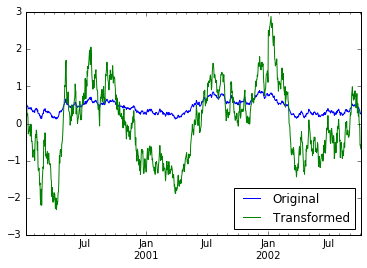

In [5]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100,min_periods=100).mean().dropna()
# moved up


print ts.head()
print ts.tail()

key = lambda x: x.year

zscore = lambda x: (x - x.mean()) / x.std()
#print ts.groupby(key).groups[2000][1]
print ts.groupby(key).head(1)
transformed = ts.groupby(key).transform(zscore)
#print transformed.groups
print "this is transformed head"
print transformed.head(10) 
#groups[2000][:5]

grouped_trans = transformed.groupby(key)
#print grouped_trans.head(10)

compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.plot()

In [11]:
countries = np.array(['US', 'UK', 'GR', 'JP'])
key = countries[np.random.randint(0, 4, 10)]
print key
print countries[[0,0,1]]

['JP' 'US' 'UK' 'US' 'JP' 'JP' 'JP' 'GR' 'US' 'JP']
['US' 'US' 'UK']


In [20]:
data = pd.Series(np.random.randn(100))
print data.head(5)
factor = pd.qcut(data, [0, .25, .5, .75, 1.])
print factor.head(5)

0   -1.490927
1   -0.781444
2    1.433773
3   -0.051255
4    0.095218
dtype: float64
0    [-2.0737, -0.698]
1    [-2.0737, -0.698]
2       (0.612, 2.532]
3    (-0.698, 0.00855]
4     (0.00855, 0.612]
dtype: category
Categories (4, object): [[-2.0737, -0.698] < (-0.698, 0.00855] < (0.00855, 0.612] < (0.612, 2.532]]


          0         1  g
0  0.471435 -1.190976  A
1  1.432707 -0.312652  A
2 -0.720589  0.887163  B
3  0.859588 -0.636524  A
4  0.015696 -2.242685  B
          0         1  g
0  0.471435 -1.190976  A
1  1.432707 -0.312652  A
2 -0.720589  3.887163  B
3  0.859588 -0.636524  A
4  0.015696  0.757315  B


/anaconda/envs/py27/lib/python2.7/site-packages/pandas/tools/plotting.py:3079: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([('A',
              {'boxes': [<matplotlib.lines.Line2D at 0x11783f5d0>,
               'caps': [<matplotlib.lines.Line2D at 0x11784e2d0>,
               'fliers': [<matplotlib.lines.Line2D at 0x11785b5d0>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x11784ef50>,
               'whiskers': [<matplotlib.lines.Line2D at 0x11783f6d0>,
                <matplotlib.lines.Line2D at 0x117866890>]}),
             ('B',
              {'boxes': [<matplotlib.lines.Line2D at 0x11756a810>,
               'caps': [<matplotlib.lines.Line2D at 0x1178011d0>,
               'fliers': [<matplotlib.lines.Line2D at 0x1177dac90>,
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x1177f91d0>,
               'whiskers': [<matplotlib.lines.Line2D at 0x11787d850>,
                <matplotlib.lines.Line2D at 0x11772a690>]})])

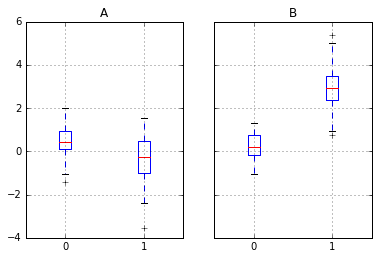

In [26]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(50, 2))
df['g'] = np.random.choice(['A', 'B'], size=50)
print df.head(5)
df.loc[df['g'] == 'B', 1] += 3
print df.head(5)
df.groupby('g').boxplot()

In [27]:
df = pd.DataFrame({'a':[1,0,0], 'b':[0,1,0], 'c':[1,0,0], 'd':[2,3,4]})
df.sum()

a    1
b    1
c    1
d    9
dtype: int64

In [51]:
df = pd.DataFrame({
 'a':  [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
 'b':  [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'c':  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 'd':  [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 })

result = {'b_sum': [3], 'c_mean': [4]}
a = pd.DataFrame(result)
print a

def compute_metrics(x):
   result = {'b_sum': [x['b'].sum()], 'c_mean': [x['c'].mean()]}
   return pd.DataFrame(result)

def compute_metrics2(x):
   result = {'b_sum': x['b'].sum(), 'c_mean': x['c'].mean()}
   return pd.Series(result)

result = df.groupby('a').apply(compute_metrics)
print result

result = df.groupby('a').apply(compute_metrics2)
result

   b_sum  c_mean
0      3       4
     b_sum  c_mean
a                 
0 0      2     0.5
1 0      2     0.5
2 0      2     0.5


,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [58]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
  'B': ['B0', 'B1', 'B2', 'B3'],
  'key1': ['K0', 'K0', 'K1', 'K2'],
  'key2': ['K0', 'K1', 'K0', 'K1']})


index = pd.MultiIndex.from_tuples([('K0', 'K0'), ('K1', 'K0'),
                                 ('K2', 'K0'), ('K2', 'K1')])


right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                   'D': ['D0', 'D1', 'D2', 'D3']},
                  index=index)
result = left.join(right, on=['key1', 'key2'])
print result

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A3  B3   K2   K1   C3   D3


In [ ]:
import numpy as np
import pandas as pd
train = pd.read_csv('../input/train_100.csv', nrows = 10)
train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1218,1,2802,2033723,36746,1,11.53,0,0.0,1
1,3,1384,1,1103,1671187,1220,1,7.64,0,0.0,1
2,3,1437,1,1204,4128360,43206,72,324.00,0,0.0,72
3,3,1463,1,2841,430175,31507,2,12.50,0,0.0,2
4,3,1629,1,1242,1752239,1250,3,22.92,0,0.0,3
5,3,1636,1,1009,471149,1109,3,45.03,0,0.0,3
6,3,2030,1,2007,207742,43084,2,16.30,0,0.0,2
7,3,2237,1,1111,611222,1284,6,18.12,0,0.0,6
8,4,1116,1,1453,112097,1212,3,25.14,0,0.0,3
9,4,1124,1,1209,4241036,1284,8,24.16,0,0.0,8


In [8]:
dictt= {0:1,1:2}
#[ohe_dict_broadcast.value[i] for i in raw_feats if i in ohe_dict_broadcast]
listt = [0,2,1]
[i for i in listt if i in dictt]


[0, 1]

In [10]:
sum([1,2,3])

6